<b>Hier begint real-deal sprint 1 notebook:<b>

# Sprint 1: Data analysis and supervised learning

We start by importing our required libraries and loading our dataset into a pandas dataframe:

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("data/complaints-2020-01-22_08_24.csv")
data.head(1)
# data.describe(include='all') #anders enkel numerieke waarden statistieken

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=fd0c04ec75d6ea0463edbde25b02cab8378c1c2837d7c5e5c030894686bd5393
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279


From the dataset, we can extract the following columns with the type of data it contains:

In [2]:
data_features = data.dtypes
data_features

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

We start by transforming al the empty fields to the same value so we change all NaN of consumer disputed to None:

In [3]:
data["Consumer disputed?"].fillna("None")

0         None
1         None
2         None
3         None
4         None
          ... 
485696      No
485697      No
485698      No
485699      No
485700      No
Name: Consumer disputed?, Length: 485701, dtype: object

To make the processing faster, we change all categorical data to numerical values and add them to the dataframe:

In [4]:
data["num_Product"] = data["Product"].astype("category").cat.codes
data["num_Sub-product"] = data["Sub-product"].astype("category").cat.codes
data["num_Issue"] = data["Issue"].astype("category").cat.codes
data["num_Sub-issue"] = data["Sub-issue"].astype("category").cat.codes
data["num_Company"] = data["Company"].astype("category").cat.codes
data["num_State"] = data["State"].astype("category").cat.codes
data["num_Submitted via"] = data["Submitted via"].astype("category").cat.codes
data["num_Company response to consumer"] = data["Company response to consumer"].astype("category").cat.codes
data["Product_issue"] = data["Product"] + "_" + data["Issue"]
data["num_Product_Issue"] = data["Product_issue"].astype("category").cat.codes
data.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,num_Product,num_Sub-product,num_Issue,num_Sub-issue,num_Company,num_State,num_Submitted via,num_Company response to consumer,Product_issue,num_Product_Issue
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,...,6,15,45,127,1488,8,0,1,"Credit reporting, credit repair services, or o...",90
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,...,7,33,56,9,2052,13,0,1,Debt collection_False statements or representa...,117


<b>Vanaf hier alles dat nog niet officieel in de notebook zit<b>

# Plots

This is the distribution of the categories of products.

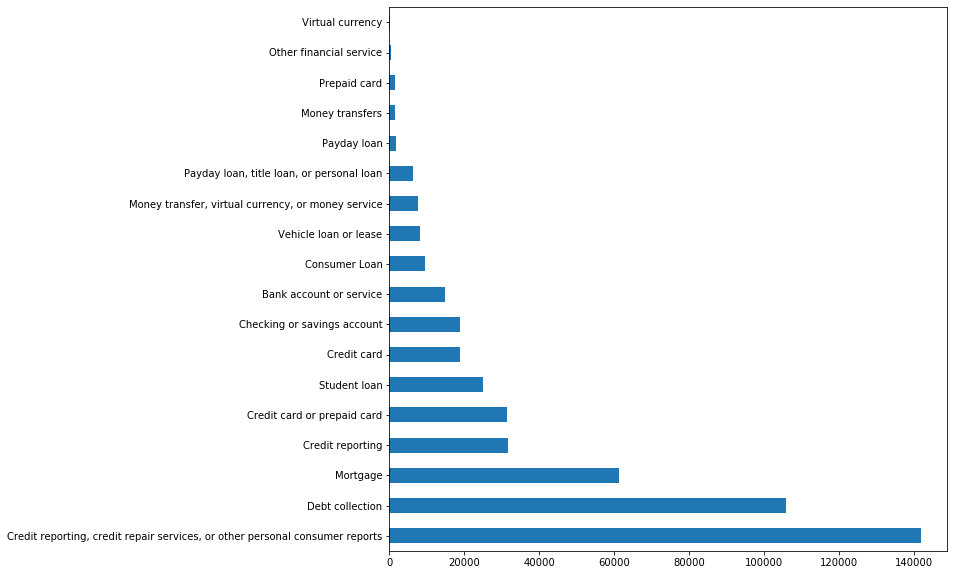

In [5]:
#duplicaten vinden
#data[data.duplicated()] #er zijn er geen over alle kolommen bekeken

#data[data.duplicated(["ZIP code","Product"])]

plt.figure(figsize=(10,10))
data["Product"].value_counts().plot(kind="barh")


Virtual currency en money transfers => money transfer,virtual...
payday loan => payday loan, title loan...
prepaid card en credit card => prepaid and credit
credit reporting => credit reporting, credit repair services...


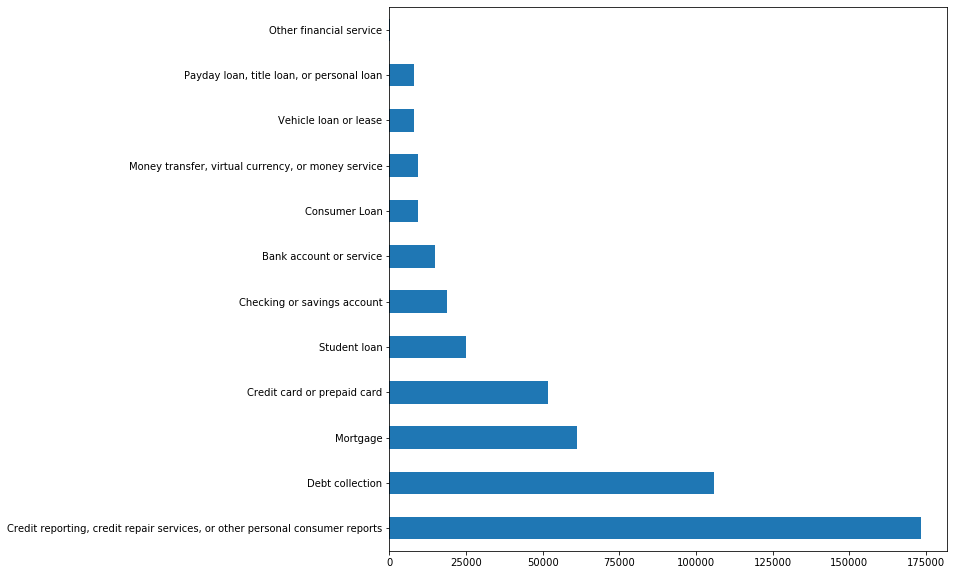

In [6]:
data["Product"].replace(to_replace="Virtual currency",value="Money transfer, virtual currency, or money service",inplace=True)
data["Product"].replace(to_replace="Money transfers",value="Money transfer, virtual currency, or money service",inplace=True)

data["Product"].replace(to_replace="Payday loan",value="Payday loan, title loan, or personal loan",inplace=True)
data["Product"].replace(to_replace="Prepaid card",value="Credit card or prepaid card",inplace=True)
data["Product"].replace(to_replace="Credit card",value="Credit card or prepaid card",inplace=True)

data["Product"].replace(to_replace="Credit reporting",value="Credit reporting, credit repair services, or other personal consumer reports",inplace=True)

plt.figure(figsize=(10,10))
data["Product"].value_counts().plot(kind="barh")

# Unnecessary columns

In [7]:
print(data.info())
data.isnull().sum(axis=0) # over alle kolommen heen
#data=data.drop(columns=["Consumer disputed?"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485701 entries, 0 to 485700
Data columns (total 28 columns):
Date received                       485701 non-null object
Product                             485701 non-null object
Sub-product                         485701 non-null object
Issue                               485701 non-null object
Sub-issue                           485701 non-null object
Consumer complaint narrative        485701 non-null object
Company public response             485701 non-null object
Company                             485701 non-null object
State                               485701 non-null object
ZIP code                            485701 non-null object
Tags                                485701 non-null object
Consumer consent provided?          485701 non-null object
Submitted via                       485701 non-null object
Date sent to company                485701 non-null object
Company response to consumer        485701 non-null object
Time

Date received                            0
Product                                  0
Sub-product                              0
Issue                                    0
Sub-issue                                0
Consumer complaint narrative             0
Company public response                  0
Company                                  0
State                                    0
ZIP code                                 0
Tags                                     0
Consumer consent provided?               0
Submitted via                            0
Date sent to company                     0
Company response to consumer             0
Timely response?                         0
Consumer disputed?                  321634
Complaint ID                             0
num_Product                              0
num_Sub-product                          0
num_Issue                                0
num_Sub-issue                            0
num_Company                              0
num_State  

Eerste stap : date received,complaint id, consumer disputed?, timely response?, date sent to company, consumer consent, submitted via,state en zip code,tags, Company public response,Company response to consumer weg

We houden over: product,subproduct,issue,subissue,consumer complaint narrative,company

Volgende stap state en zip code, (tags?) meepakken

In [8]:
data["Company"].unique()

array(['Experian Information Solutions Inc.',
       'Ideal Collection Services, Inc.',
       'ONEMAIN FINANCIAL HOLDINGS, LLC.', ..., 'Homes By Hunt LLC',
       'Maxitransfers Corporation', 'Reliable Auto Finance, Inc.'],
      dtype=object)

# Text Processing

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
subdata = data[["Complaint ID","Consumer complaint narrative","Product","Issue"]][:50000]

count_vect = CountVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    min_df=0.04,
    max_df=0.7
)

X_train_counts = count_vect.fit_transform(subdata["Consumer complaint narrative"])
feature_names=count_vect.get_feature_names()

In [66]:
tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts)

In [67]:
index=0
print(subdata.at[index, "Consumer complaint narrative"])
print(subdata.at[index, "Product"])
print(subdata.at[index, "Issue"])



features = X_train_tf[index]
print(X_train_tf[index])

terms = pd.DataFrame(features.T.todense(), index=feature_names, columns=["tfidf"])
terms.sort_values(by=["tfidf"],ascending=False).head(n=10)

I have complained many times that the credit reporting by Experian is inaccurate and they always just say wait awhile, it will be fixed later and yet it never is. They are incapable of providing accurate information and do not take responsibility for their errors. This is a fake service, designed to serve only their needs and not the consumer 's needs. I can not find any way to cancel and when I mention it on the phone I am immediately disconnected. 
I want to be a part of the class action lawsuit against them since they are responsible for reducing my credit rating, releasing my personal information and my fraud complaints have multiplied over the last 2-3 years. I have spoken to many ineffectual and uncaring agents on their phone support lines and am just tired of paying them to degrade my credit for random incorrect reasons ( like I paid a utility bill with another bank account ) and not raising it for legitimate things like paying off thousands of dollars of debt, getting 3 new cre

,tfidf
just,0.370951
credit,0.347285
paying,0.292606
new,0.254045
like,0.246111
phone,0.223544
information,0.168986
action,0.163563
accurate,0.162131
say,0.157619


Now we assign the tfidf score of the words per narrative to a dataframe which contains some other columns like Productnumber, issuenumber, etc.

In [68]:
max_index = subdata.shape[0]
feature_words = X_train_tf[:max_index]
result = pd.DataFrame(feature_words.todense(), columns = feature_names)
result["num_Product"] = data["num_Product"][:max_index]
result["num_Sub_product"] = data["num_Sub-product"][:max_index]
result["num_Issue"] = data["num_Issue"][:max_index]
result["num_Sub_issue"] = data["num_Sub-issue"][:max_index]
result["num_Company"] = data["num_Company"][:max_index]
result["num_State"] = data["num_State"][:max_index]
result["num_Submitted_via"] = data["num_Submitted via"][:max_index]
result["num_Company_response_to_consumer"] = data["num_Company response to consumer"][:max_index]
result["num_Product_Issue"] = data["num_Product_Issue"][:max_index]
result

,00,00 xxxx,10,19,2019,30,30 days,able,access,account,...,years,num_Product,num_Sub_product,num_Issue,num_Sub_issue,num_Company,num_State,num_Submitted_via,num_Company_response_to_consumer,num_Product_Issue
0,0.086710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069478,...,0.122212,6,15,45,127,1488,8,0,1,90
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.275471,...,0.000000,7,33,56,9,2052,13,0,1,117
2,0.130035,0.000000,0.236300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.366551,7,33,14,60,2948,13,0,1,113
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101986,...,0.000000,7,51,14,61,1337,57,0,1,113
4,0.000000,0.000000,0.000000,0.129173,0.000000,0.000000,0.000000,0.000000,0.000000,0.054806,...,0.048202,6,15,70,170,953,47,0,1,97
5,0.000000,0.000000,0.184931,0.000000,0.258039,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143433,7,45,14,58,1331,15,0,3,113
6,0.324585,0.422624,0.084263,0.000000,0.058787,0.073671,0.000000,0.000000,0.000000,0.000000,...,0.000000,6,15,112,189,1386,31,0,1,101
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054782,...,0.000000,6,15,73,92,1488,17,0,3,98
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014203,...,0.000000,6,15,73,92,1488,13,0,3,98
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069959,...,0.000000,13,35,122,110,594,21,0,1,186


# Manu
num_Product_Issue als target en enkel tfidfs overhouden


In [80]:
from sklearn.model_selection import train_test_split
y = result["num_Product_Issue"].values
x = result.drop(['num_Product_Issue','num_Company_response_to_consumer','num_Submitted_via','num_State','num_Company','num_Sub_issue','num_Issue','num_Sub_product','num_Product'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
print(x_train.head())

40000
10000
40000
10000
             00  00 xxxx        10   19  2019        30   30 days  able  \
20330  0.000000      0.0  0.000000  0.0   0.0  0.114807  0.129063   0.0   
17532  0.000000      0.0  0.000000  0.0   0.0  0.000000  0.000000   0.0   
45819  0.404908      0.0  0.000000  0.0   0.0  0.000000  0.000000   0.0   
34807  0.000000      0.0  0.000000  0.0   0.0  0.000000  0.000000   0.0   
31888  0.000000      0.0  0.271016  0.0   0.0  0.000000  0.000000   0.0   

       access  account  ...     xx xx   xx xxxx  xxxx account  xxxx called  \
20330     0.0  0.00000  ...  0.000000  0.000000           0.0          0.0   
17532     0.0  0.09293  ...  0.215821  0.331248           0.0          0.0   
45819     0.0  0.00000  ...  0.322918  0.000000           0.0          0.0   
34807     0.0  0.00000  ...  0.000000  0.000000           0.0          0.0   
31888     0.0  0.00000  ...  0.000000  0.000000           0.0          0.0   

       xxxx credit  xxxx received  xxxx xx  xxxx xxxx  y

In [77]:
from sklearn.model_selection import GridSearchCV
neigh = KNeighborsClassifier(n_neighbors=int(math.sqrt(len(x_train))))
parameters=[{'n_neighbors': [1,5,10,20,50,89, 100, 1000]}]

search = GridSearchCV(neigh, parameters)
search.fit(x_train,y_train)
print(search.best_params_)

C:\Users\manus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\manus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 10}


0,4445 met 10 neighbors

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
buren=10
neigh = KNeighborsClassifier(n_neighbors=buren)
neigh.fit(x_train, y_train)
predictions=neigh.predict(x_test)
print(accuracy_score(y_true=y_test, y_pred=predictions))

0.4106


In [71]:
from sklearn.neighbors import NearestNeighbors
import math
knn = NearestNeighbors(n_neighbors=buren, metric="cosine")
values = x_train.iloc[1].values
features=values.reshape(1,-1)
knn.fit(x_train)
distances, neighbors = knn.kneighbors(features)
for distance, neighbor in zip(distances[0], neighbors[0]):
    print(distance, result.at[neighbor, 'num_Product_Issue'], sep=":\t")

0.0:	117
0.25903915725736026:	113
0.2731020252835564:	39
0.30552919898560627:	114
0.3119757328089947:	101
0.3150417904607703:	113
0.3218054494998589:	159
0.32217445869727057:	101
0.3259142869243149:	158
0.33244681930743636:	101
0.33433626290073104:	98
0.3354702929460939:	101
0.3376065077469447:	154
0.33936837978461143:	136
0.3404287056687946:	101
0.3410689129327015:	113
0.34591459932894275:	98
0.3469238264988863:	98
0.34852595995882496:	213
0.3494370096563997:	98
0.3503757829300632:	98
0.3504612454692422:	101
0.3544043086993627:	98
0.3571602608165073:	101
0.3576014382033298:	219
0.3613474765413234:	98
0.36141265796490596:	98
0.3624463672557534:	98
0.36264979249979257:	98
0.36346360181114856:	113
0.3636989088642292:	101
0.3646189084234922:	122
0.36545544776273053:	98
0.3655970204810983:	114
0.36578785417857873:	122
0.36592706422636556:	120
0.36661309300128275:	103
0.36674382034379505:	113
0.36768442422807623:	101
0.36777641936906524:	121
0.3681734355205388:	98
0.36831327400300506:	121
0

In [72]:
print(data.loc[data['num_Product_Issue'] == 117]["Product"][:1])
print(data.loc[data['num_Product_Issue'] == 98]["Product"][:1])
print(data.loc[data['num_Product_Issue'] == 117]["Issue"][:1])
print(data.loc[data['num_Product_Issue'] == 98]["Issue"][:1])

1    Debt collection
Name: Product, dtype: object
7    Credit reporting, credit repair services, or o...
Name: Product, dtype: object
1    False statements or representation
Name: Issue, dtype: object
7    Incorrect information on your report
Name: Issue, dtype: object


num_Product_Issue als target en product en issue droppen

In [73]:
y = result["num_Product_Issue"].values
x = result.drop(['num_Product_Issue','num_Sub_issue','num_Issue','num_Sub_product','num_Product'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
print(x_train.head())

40000
10000
40000
10000
             00  00 xxxx        10   19  2019        30   30 days  able  \
20330  0.000000      0.0  0.000000  0.0   0.0  0.114807  0.129063   0.0   
17532  0.000000      0.0  0.000000  0.0   0.0  0.000000  0.000000   0.0   
45819  0.404908      0.0  0.000000  0.0   0.0  0.000000  0.000000   0.0   
34807  0.000000      0.0  0.000000  0.0   0.0  0.000000  0.000000   0.0   
31888  0.000000      0.0  0.271016  0.0   0.0  0.000000  0.000000   0.0   

       access  account  ...  xxxx credit  xxxx received  xxxx xx  xxxx xxxx  \
20330     0.0  0.00000  ...     0.127066            0.0   0.0000   0.201759   
17532     0.0  0.09293  ...     0.000000            0.0   0.0529   0.107943   
45819     0.0  0.00000  ...     0.000000            0.0   0.0000   0.000000   
34807     0.0  0.00000  ...     0.000000            0.0   0.0000   0.000000   
31888     0.0  0.00000  ...     0.000000            0.0   0.0000   0.000000   

       year     years  num_Company  num_State  num

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=int(math.sqrt(len(x_train))))
parameters=[{'n_neighbors': [1,5,10,20,50,89, 100, 1000]}]

search = GridSearchCV(neigh, parameters)
search.fit(x_train,y_train)
print(search.best_params_)

C:\Users\manus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\manus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [79]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)
predictions=neigh.predict(x_test)
print(accuracy_score(y_true=y_test, y_pred=predictions))

0.3959


In [75]:
knn = NearestNeighbors(n_neighbors=int(math.sqrt(len(x_train))), metric="cosine")
values = x_train.iloc[1].values
features=values.reshape(1,-1)
knn.fit(x_train)
distances, neighbors = knn.kneighbors(features)
for distance, neighbor in zip(distances[0], neighbors[0]):
    print(distance, result.at[neighbor, 'num_Product_Issue'], sep=":\t")

0.0:	117
7.923509925955585e-07:	40
8.683978273138493e-07:	5
8.731063789735316e-07:	113
1.053196801326095e-06:	101
1.0684470538313562e-06:	93
1.0859407680863242e-06:	125
1.1098782926044493e-06:	98
1.120546625932306e-06:	101
1.161230039903316e-06:	10
1.1920044740154623e-06:	226
1.194122543846099e-06:	113
1.213345243722408e-06:	101
1.2173654975189407e-06:	159
1.234095541424729e-06:	113
1.2575123503610897e-06:	228
1.2772201326560761e-06:	114
1.2867927836612836e-06:	159
1.287722620313403e-06:	159
1.3206837189416731e-06:	114
1.3276594222899618e-06:	113
1.3685935402740768e-06:	40
1.3773480802559135e-06:	98
1.3868981260101165e-06:	113
1.3970917378536285e-06:	98
1.403078252582013e-06:	36
1.4097492083697816e-06:	122
1.4212659523726856e-06:	98
1.4407561707008298e-06:	98
1.4660301763669281e-06:	159
1.481495122579446e-06:	103
1.4861753602213312e-06:	98
1.4879073657603215e-06:	113
1.4882436774055208e-06:	10
1.4934050628356843e-06:	97
1.4959655200152966e-06:	113
1.5012995293606224e-06:	158
1.53156764

# Robbe
product als target
<br>
issue als target

# Vince
Word embeddings
vergelijken van resultaten

We start by importing gensim which we will use to make our word2vec model

In [11]:
import sys
!{sys.executable} -m pip install gensim
import gensim

We have to transform our text data to tokens for witch we will use the build_tokenizer() from the CountVectorizer:

In [19]:
tokenizer = count_vect.build_tokenizer()
tokenlists = [tokenizer(complaint) for complaint in subdata["Consumer complaint narrative"]]

In [33]:
model = gensim.models.Word2Vec(tokenlists, size=200)
model.train(tokenlists, total_examples=len(tokenlists), epochs=5)

(32659609, 45260090)

In [38]:
model.wv.similar_by_word("reporting")

[('reported', 0.6424134969711304),
 ('reportings', 0.4853643476963043),
 ('reports', 0.4852125942707062),
 ('reflecting', 0.4794136881828308),
 ('Reporting', 0.4769088923931122),
 ('report', 0.4759211242198944),
 ('updating', 0.4458032250404358),
 ('marks', 0.4368200898170471),
 ('listed', 0.41370612382888794),
 ('collection', 0.4067854881286621)]

In [39]:
from sklearn.linear_model import LogisticRegression
max_dataset_size = len(model.wv.vectors)
subdata_products = data["num_Product"][:50000]
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(model.wv.vectors, subdata_products[:max_dataset_size])
predict = clf.predict(model.wv.vectors[:10000, :])
score = clf.score(model.wv.vectors, subdata_products[:max_dataset_size])


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
print(predict[:100])
print(subdata_products.values[:100])

[ 6  6  6  6  6  6  6  6  6  4  6  6  6  6  6  6  6  6  6  6  6  6  4  6
  6  6  6  6  6 10  6  6  6  6  6  6  6  6 16  6  7  6  6  6  6  6  6  6
  6  6  6  6  6  6  4  6  6  6  6  7  6  7  6  6  6  4  6  6  6  6  7  6
  6  6  6  4  6  6  6  6  6  6  4  6  6  6  6  6  6  6  6  6  6  6  6  4
  6  4  6  6]
[ 6  7  7  7  6  7  6  6  6 13  6 10 13  6  6  6  6  6  6  6  6  4  7  7
  6  6  6  1  7  7  7 10  6  6  6  6 15  6 16  6  7  6  6  6  8  7  6  7
  7  6  4  6 13  6 10 16  6  6  6  7  6  6 10  6  7 15  6  6 10  6  6  6
  7  6 10  6  6 10  6  7  6  6  4  6  7  7 16  6  6  6  6  6  7  6  6  1
  4  4  6  6]


In [45]:
print(score)

0.464662136857311
